In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [117]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# This code gets data from Bertec Force Plate with csv file.

class COP:

  def __init__(self,dir,start,finish):
    
    #from csv to pandas dataframe
    self.dataframe = pd.read_csv(dir).iloc[start*100:finish*100+1]
    #get file name from csv file
    self.filename = dir[dir.rfind('/')+1:dir.find('.')]
    #95%, n=2 chi_square
    self.chi_square = 5.99146

  #crop CoPx, CoPy dataframe from pandas dataframe
  def data(self):
    return self.dataframe[['CoPx','CoPy']]

  #CoPx, CoPy covariance matrix
  def covariance(self):
    return self.dataframe[['CoPx','CoPy']].cov()

  #CoPx, CoPy root mean square
  def rms(self,dataframe):
    return self.dataframe[['CoPx','CoPy']].std()
  
  #CoPx, CoPy eigenvalues
  def eigenvalues(self):
    return np.linalg.eig(self.covariance())[0]

  #CoPx, CoPy eigenvectors
  def eigenvectors(self):
    return np.linalg.eig(self.covariance())[1]

  #pearson coefficient
  def pearson_coeff(self):                      
    cov_xy = self.covariance(self.dataframe).loc['CoPx','CoPy']
    std_x = self.covariance(self.dataframe).loc['CoPx','CoPx']
    std_y = self.covariance(self.dataframe).loc['CoPy','CoPy']

    pearson = cov_xy/math.sqrt((std_x * std_y))
    
    return pearson

  #95% Prediction Ellipse Area
  def PEA(self, fatigue=False):
    area = math.pi * self.chi_square * math.sqrt(self.eigenvalues()[0]*self.eigenvalues()[1])

    if fatigue == True :
      fatigue = 'after-fatigue'
    else:
      fatigue = 'before-fatigue'

    return f'({fatigue}) Prediction Ellipse Area is {round(area*10000,2)} cm^2'

  #COP sway mean velocity
  def cop_mean_velocity(self, fatigue=False):

    path_length = 0
    time = (self.dataframe.shape[0]-1)/100

    for i in range(self.dataframe.shape[0]-1):
      path_length += math.sqrt(math.pow((self.dataframe.iloc[i+1]['CoPx'] - self.dataframe.iloc[i]['CoPx']),2) +
                        math.pow((self.dataframe.iloc[i+1]['CoPy'] - self.dataframe.iloc[i]['CoPy']),2)
                        )
    
    mean_vel = path_length*100/time

    if fatigue == True :
      fatigue = 'after-fatigue'
    else:
      fatigue = 'before-fatigue'

    return f'({fatigue}) COP mean velocity is {round(mean_vel,2)} cm/s'
  
  #print COP mean velocity and 95% Prediction Ellipse Area
  def data_info(self,fatigue=False):
    print(self.cop_mean_velocity(fatigue))
    print(self.PEA(fatigue))

  #plot COP datapoints and 95% Prediction Ellipse Area
  def plot_data_ellipse(self, title='', fig_size=12, point_color='blue', linestyle='-'):
    plt.axes().set_aspect('equal')
    
    plt.title(title)
    plt.xlabel("COP in Anterior-Posterior Direction (cm)",fontweight = "bold")
    plt.ylabel("COP in Medial-Lateral Direction (cm)",fontweight = "bold")
    plt.scatter((self.dataframe['CoPx']-self.dataframe['CoPx'].mean())*100,(self.dataframe['CoPy']-self.dataframe['CoPy'].mean())*100,s=0.2,c=point_color)
    plt.xticks(np.arange(np.round_(self.dataframe['CoPx'].to_numpy().min()-self.dataframe['CoPx'].mean(),3)*100-1.5, np.round_(self.dataframe['CoPx'].to_numpy().max()-self.dataframe['CoPx'].mean(),3)*100+1.5, 1))
    plt.yticks(np.arange(np.round_(self.dataframe['CoPy'].to_numpy().min()-self.dataframe['CoPy'].mean(),3)*100-1.5, np.round_(self.dataframe['CoPy'].to_numpy().max()-self.dataframe['CoPy'].mean(),3)*100+1.5, 0.5))
    # plt.figure(figsize=(fig_size,fig_size))

    width = math.sqrt(self.chi_square * self.eigenvalues()[0])*100*2
    height = math.sqrt(self.chi_square * self.eigenvalues()[1])*100*2

    angle = math.acos(abs(self.eigenvectors()[0][0]) / math.sqrt(math.pow(self.eigenvectors()[0][0],2)+math.pow(self.eigenvectors()[0][1],2))) * 180/math.pi

    ax = plt.gca()

    ellipse = Ellipse(xy=(0, 0), width=width, height=height,
                            angle=angle, edgecolor='k', fc='None', ls=linestyle, lw=2)
    
    ax.add_patch(ellipse)
  

In [118]:
Data_Instance_List = []

Nf_NF_task1 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/Nflat_Nfatigue_task1.csv',5,55)
Nf_NF_task2 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/Nflat_Nfatigue_task2.csv',5,55)
Nf_NF_task3 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/Nflat_Nfatigue_task3.csv',5,55)
Nf_NF_task4 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/Nflat_Nfatigue_task4.csv',5,55)

Nf_F_task1 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/Nflat_fatigue_task1.csv',5,55)
Nf_F_task2 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/Nflat_fatigue_task2.csv',5,55)
Nf_F_task3 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/Nflat_fatigue_task3.csv',5,55)
Nf_F_task4 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/Nflat_fatigue_task4.csv',5,55)

f_NF_task1 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/flat_Nfatigue_task1.csv',5,55)
f_NF_task2 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/flat_Nfatigue_task2.csv',5,55)
f_NF_task3 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/flat_Nfatigue_task3.csv',5,55)
f_NF_task4 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/flat_Nfatigue_task4.csv',5,55)

f_F_task1 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/flat_fatigue_task1.csv',5,55)
f_F_task2 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/flat_fatigue_task2.csv',5,55)
f_F_task3 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/flat_fatigue_task3.csv',5,55)
f_F_task4 = COP('/content/drive/MyDrive/SEL_Summer_intern/Week1_Forceplate_data/flat_fatigue_task4.csv',5,55)

Data_Instance_List.extend([
                           Nf_NF_task1,Nf_F_task1,
                           Nf_NF_task2,Nf_F_task2,
                           Nf_NF_task3,Nf_F_task3,
                           Nf_NF_task4,Nf_F_task4,
                           f_NF_task1,f_F_task1,
                           f_NF_task2,f_F_task2,
                           f_NF_task3,f_F_task3,
                           f_NF_task4,f_F_task4
                           ])

(before-fatigue) COP mean velocity is 1.66 cm/s
(before-fatigue) Prediction Ellipse Area is 14.11 cm^2
(after-fatigue) COP mean velocity is 1.54 cm/s
(after-fatigue) Prediction Ellipse Area is 3.61 cm^2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


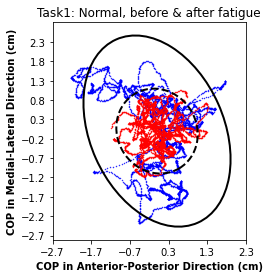

In [119]:
Data_Instance_List[0].data_info()
Data_Instance_List[0].plot_data_ellipse()

Data_Instance_List[1].data_info(fatigue=True)
Data_Instance_List[1].plot_data_ellipse(title='Task1: Normal, before & after fatigue',point_color='r', linestyle='--')

(before-fatigue) COP mean velocity is 4.52 cm/s
(before-fatigue) Prediction Ellipse Area is 9.74 cm^2
(after-fatigue) COP mean velocity is 5.35 cm/s
(after-fatigue) Prediction Ellipse Area is 19.55 cm^2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


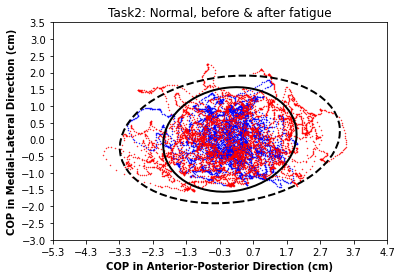

In [120]:
Data_Instance_List[2].data_info()
Data_Instance_List[2].plot_data_ellipse()

Data_Instance_List[3].data_info(fatigue=True)
Data_Instance_List[3].plot_data_ellipse(title='Task2: Normal, before & after fatigue',point_color='r', linestyle='--')

(before-fatigue) COP mean velocity is 3.11 cm/s
(before-fatigue) Prediction Ellipse Area is 9.27 cm^2
(after-fatigue) COP mean velocity is 3.3 cm/s
(after-fatigue) Prediction Ellipse Area is 12.15 cm^2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


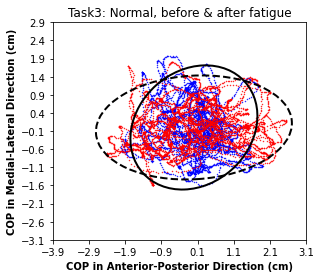

In [121]:
Data_Instance_List[4].data_info()
Data_Instance_List[4].plot_data_ellipse()

Data_Instance_List[5].data_info(fatigue=True)
Data_Instance_List[5].plot_data_ellipse(title='Task3: Normal, before & after fatigue',point_color='r', linestyle='--')

(before-fatigue) COP mean velocity is 7.03 cm/s
(before-fatigue) Prediction Ellipse Area is 26.02 cm^2
(after-fatigue) COP mean velocity is 7.29 cm/s
(after-fatigue) Prediction Ellipse Area is 19.12 cm^2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


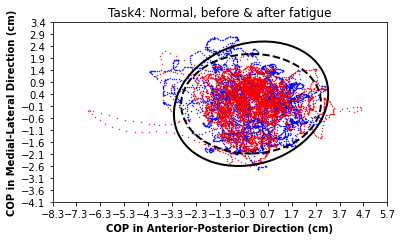

In [122]:
Data_Instance_List[6].data_info()
Data_Instance_List[6].plot_data_ellipse()

Data_Instance_List[7].data_info(fatigue=True)
Data_Instance_List[7].plot_data_ellipse(title='Task4: Normal, before & after fatigue', point_color='r', linestyle='--')

(before-fatigue) COP mean velocity is 1.23 cm/s
(before-fatigue) Prediction Ellipse Area is 3.25 cm^2
(after-fatigue) COP mean velocity is 1.47 cm/s
(after-fatigue) Prediction Ellipse Area is 4.58 cm^2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


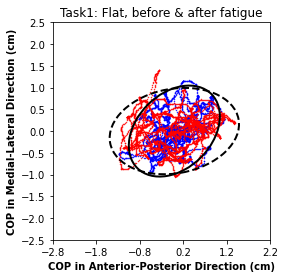

In [123]:
Data_Instance_List[8].data_info()
Data_Instance_List[8].plot_data_ellipse()

Data_Instance_List[9].data_info(fatigue=True)
Data_Instance_List[9].plot_data_ellipse(title='Task1: Flat, before & after fatigue',point_color='r', linestyle='--')

(before-fatigue) COP mean velocity is 5.15 cm/s
(before-fatigue) Prediction Ellipse Area is 12.61 cm^2
(after-fatigue) COP mean velocity is 5.26 cm/s
(after-fatigue) Prediction Ellipse Area is 14.7 cm^2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


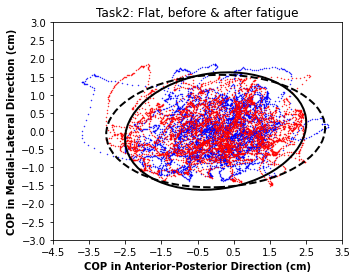

In [124]:
Data_Instance_List[10].data_info()
Data_Instance_List[10].plot_data_ellipse()

Data_Instance_List[11].data_info(fatigue=True)
Data_Instance_List[11].plot_data_ellipse(title='Task2: Flat, before & after fatigue',point_color='r', linestyle='--')

(before-fatigue) COP mean velocity is 2.95 cm/s
(before-fatigue) Prediction Ellipse Area is 9.88 cm^2
(after-fatigue) COP mean velocity is 2.79 cm/s
(after-fatigue) Prediction Ellipse Area is 10.25 cm^2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


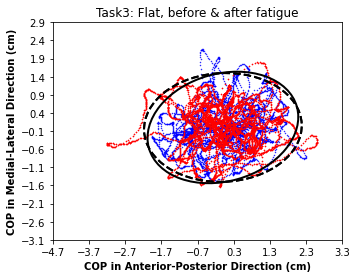

In [125]:
Data_Instance_List[12].data_info()
Data_Instance_List[12].plot_data_ellipse()

Data_Instance_List[13].data_info(fatigue=True)
Data_Instance_List[13].plot_data_ellipse(point_color='r', linestyle='--')
Data_Instance_List[13].plot_data_ellipse(title='Task3: Flat, before & after fatigue',point_color='r', linestyle='--')


(before-fatigue) COP mean velocity is 6.27 cm/s
(before-fatigue) Prediction Ellipse Area is 16.84 cm^2
(after-fatigue) COP mean velocity is 6.99 cm/s
(after-fatigue) Prediction Ellipse Area is 20.76 cm^2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


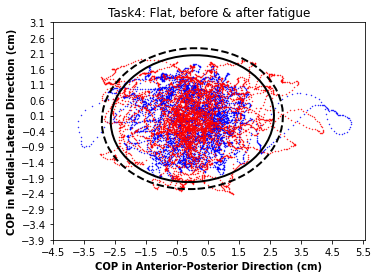

In [126]:
Data_Instance_List[14].data_info()
Data_Instance_List[14].plot_data_ellipse()

Data_Instance_List[15].data_info(fatigue=True)
Data_Instance_List[15].plot_data_ellipse(title='Task4: Flat, before & after fatigue',point_color='r', linestyle='--')